<a href="https://colab.research.google.com/github/swarnavopramanik/Indivision/blob/main/IndiVision_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 36.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import ultralytics
ultralytics.checks()


Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.0/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="TkEfir5u7HBdncrkQxWs")
project = rf.workspace("swarnavo").project("my-first-project-rqebl")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
dataset.location

'/content/My-First-Project-1'

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=50 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 98.8MB/s]
Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/My-First-Project-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

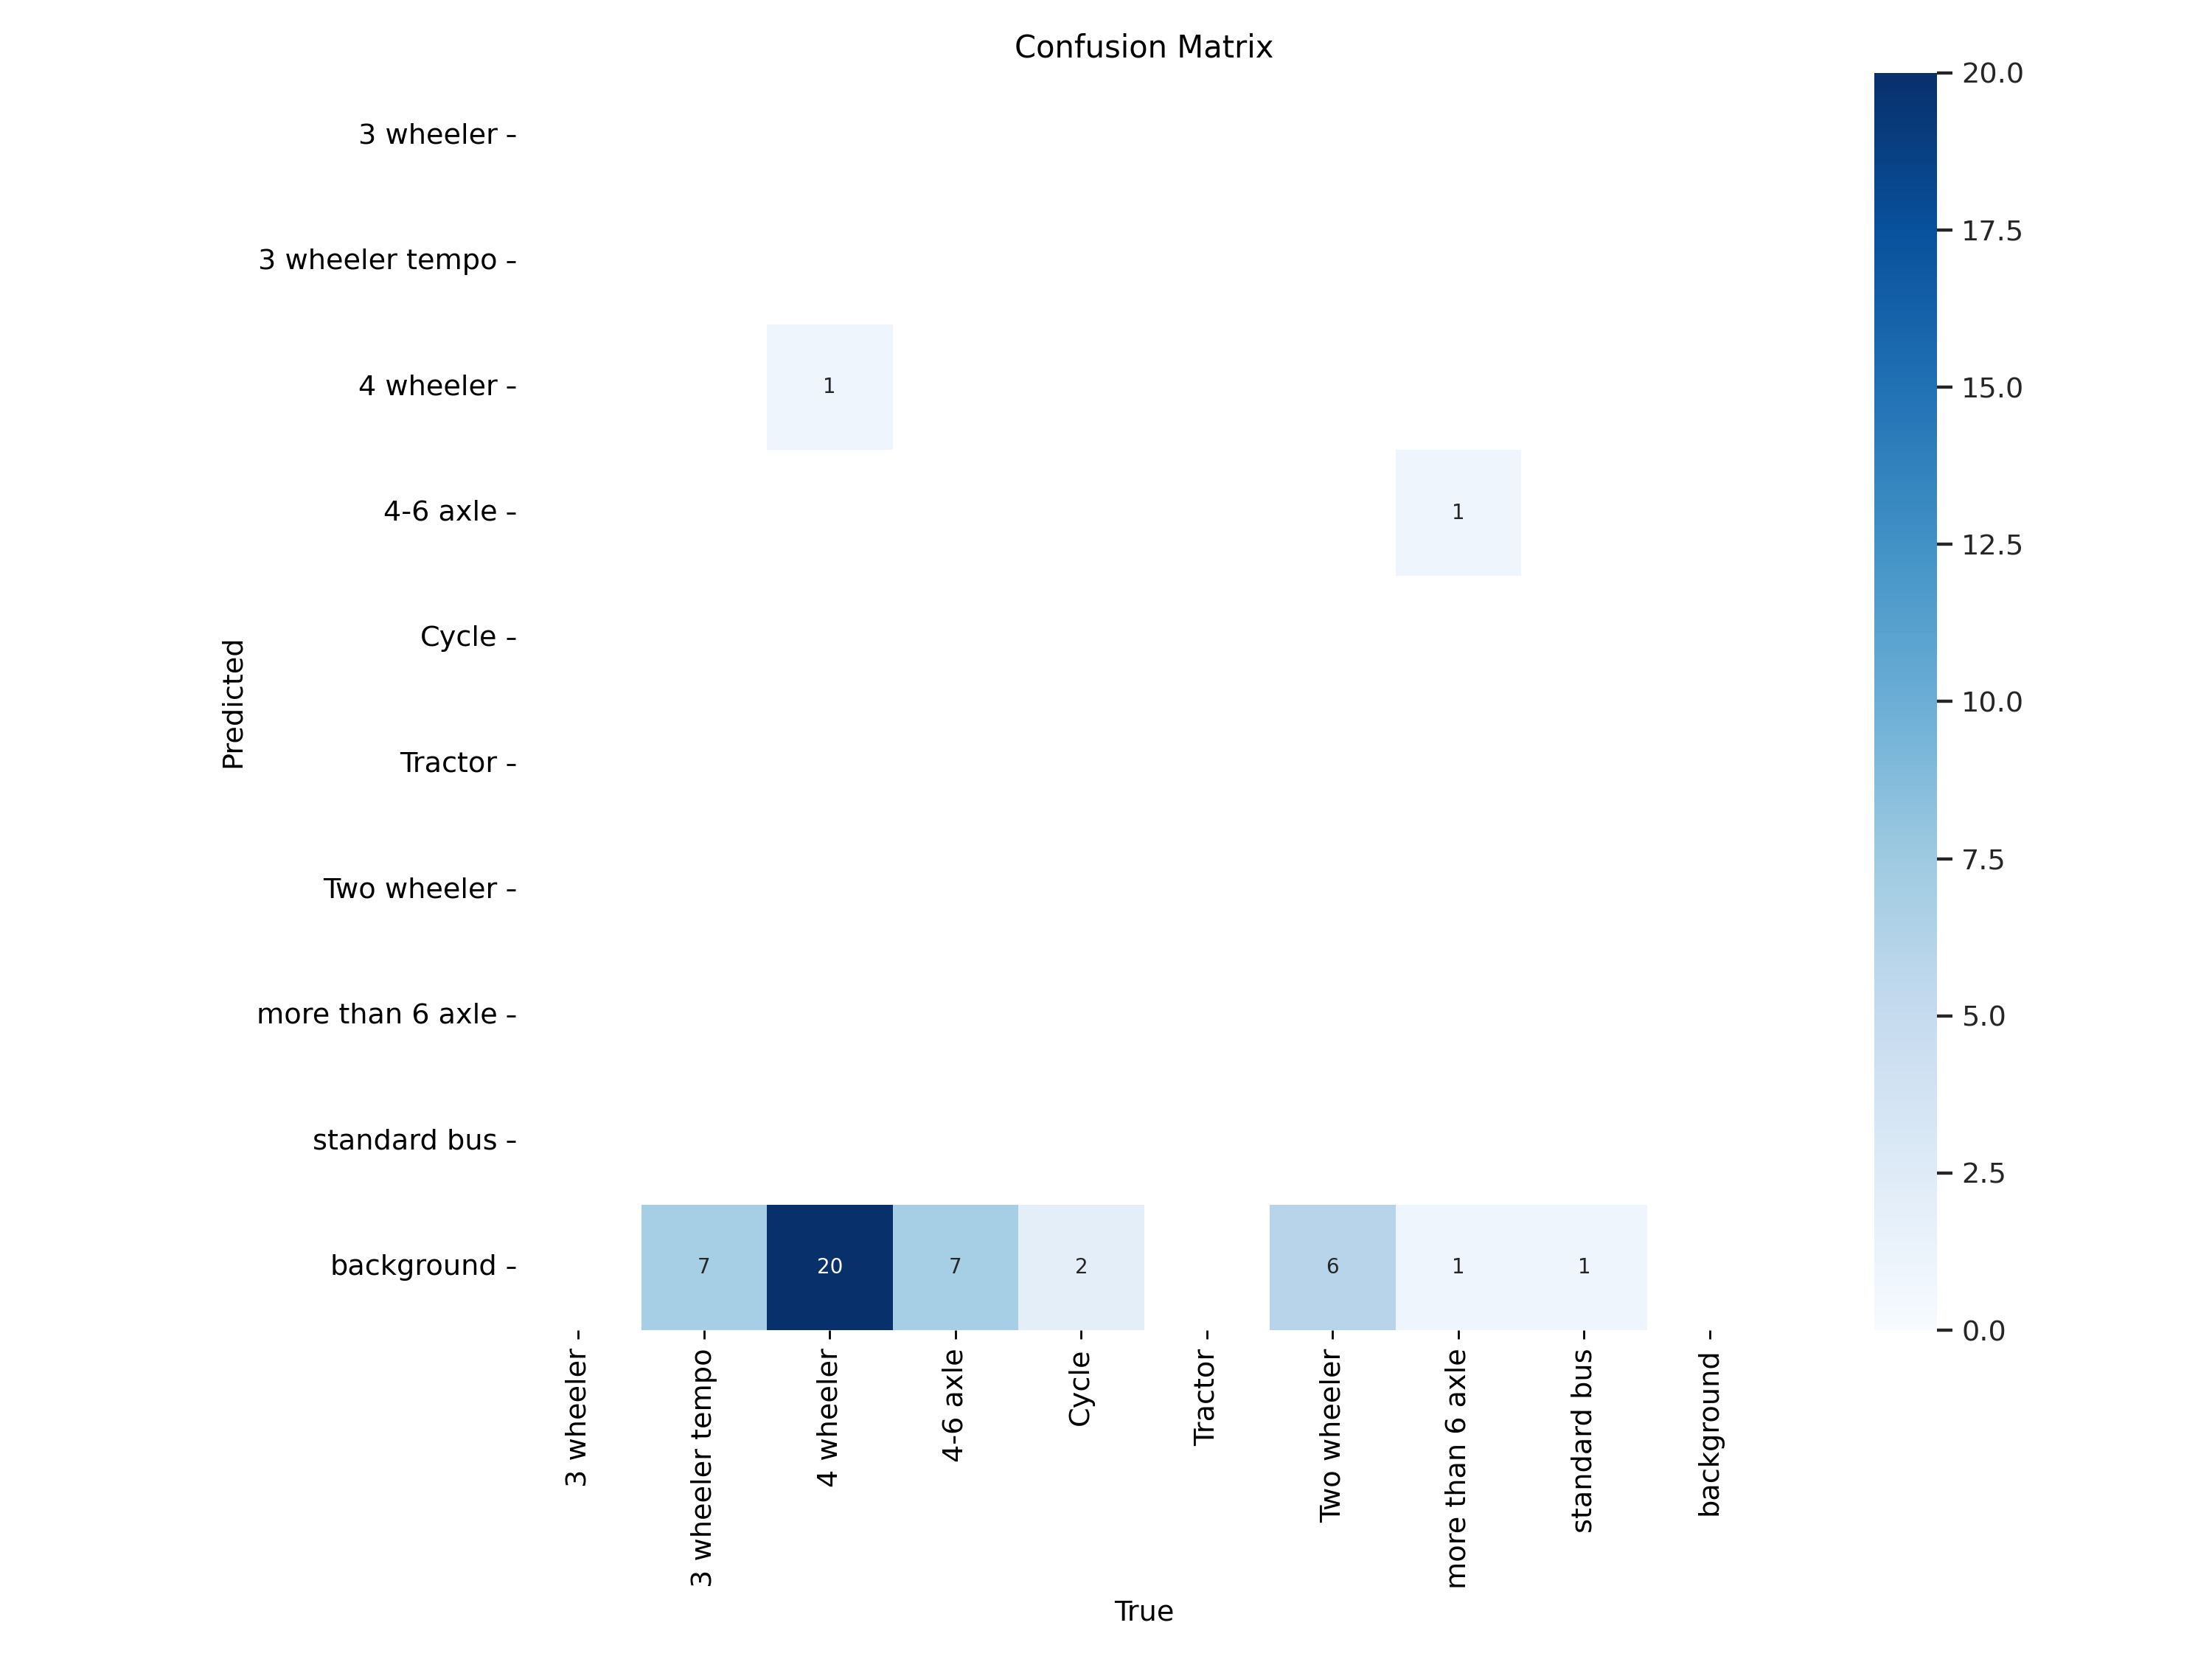

In [ ]:
from IPython.display import display, Image

display(Image("/content/runs/detect/train/confusion_matrix.png", width=600))

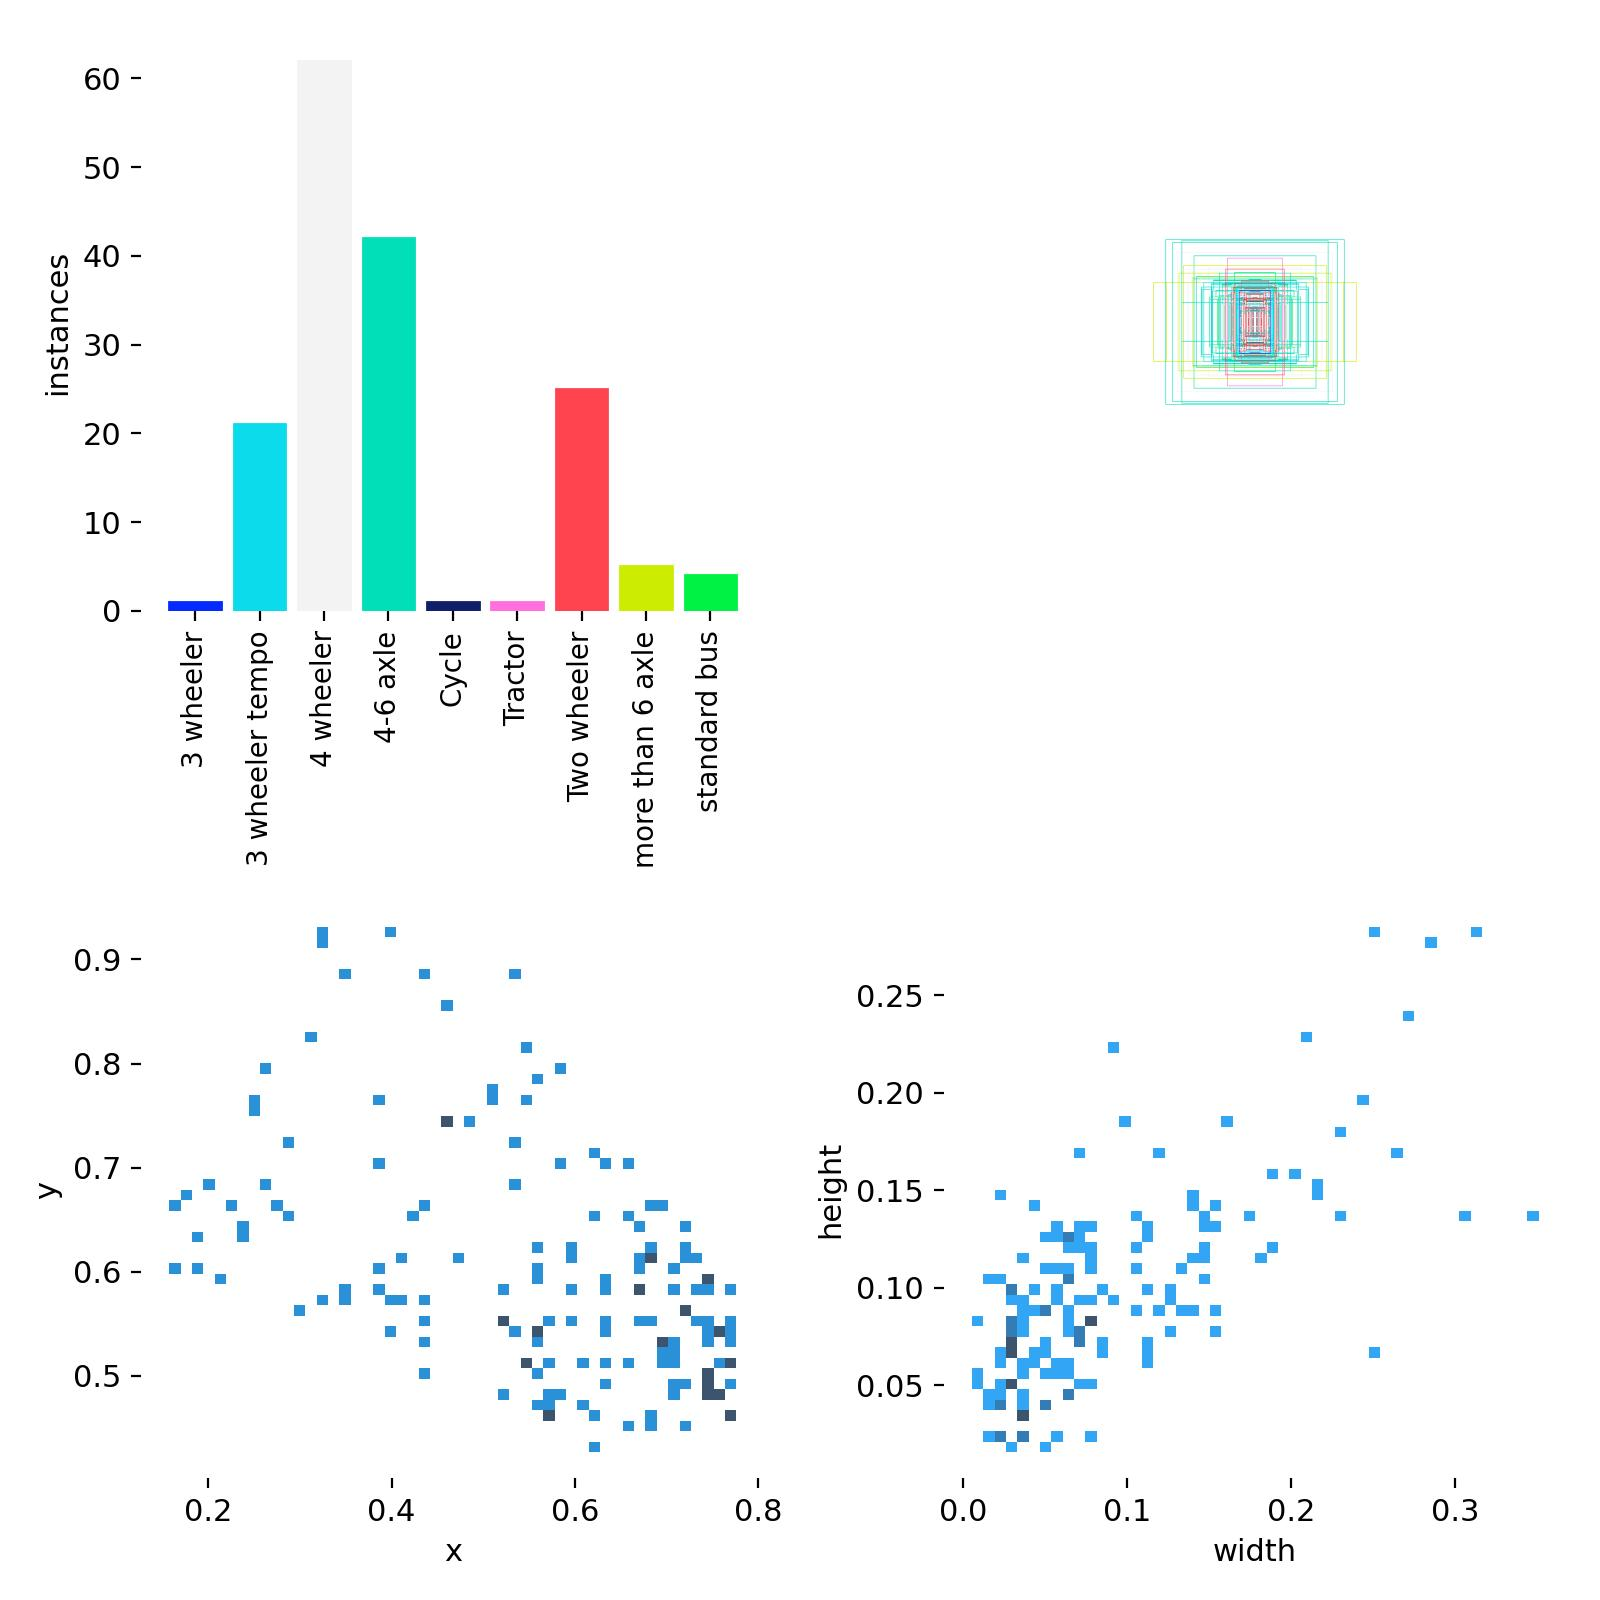

In [ ]:
Image("/content/runs/detect/train/labels.jpg", width=600)

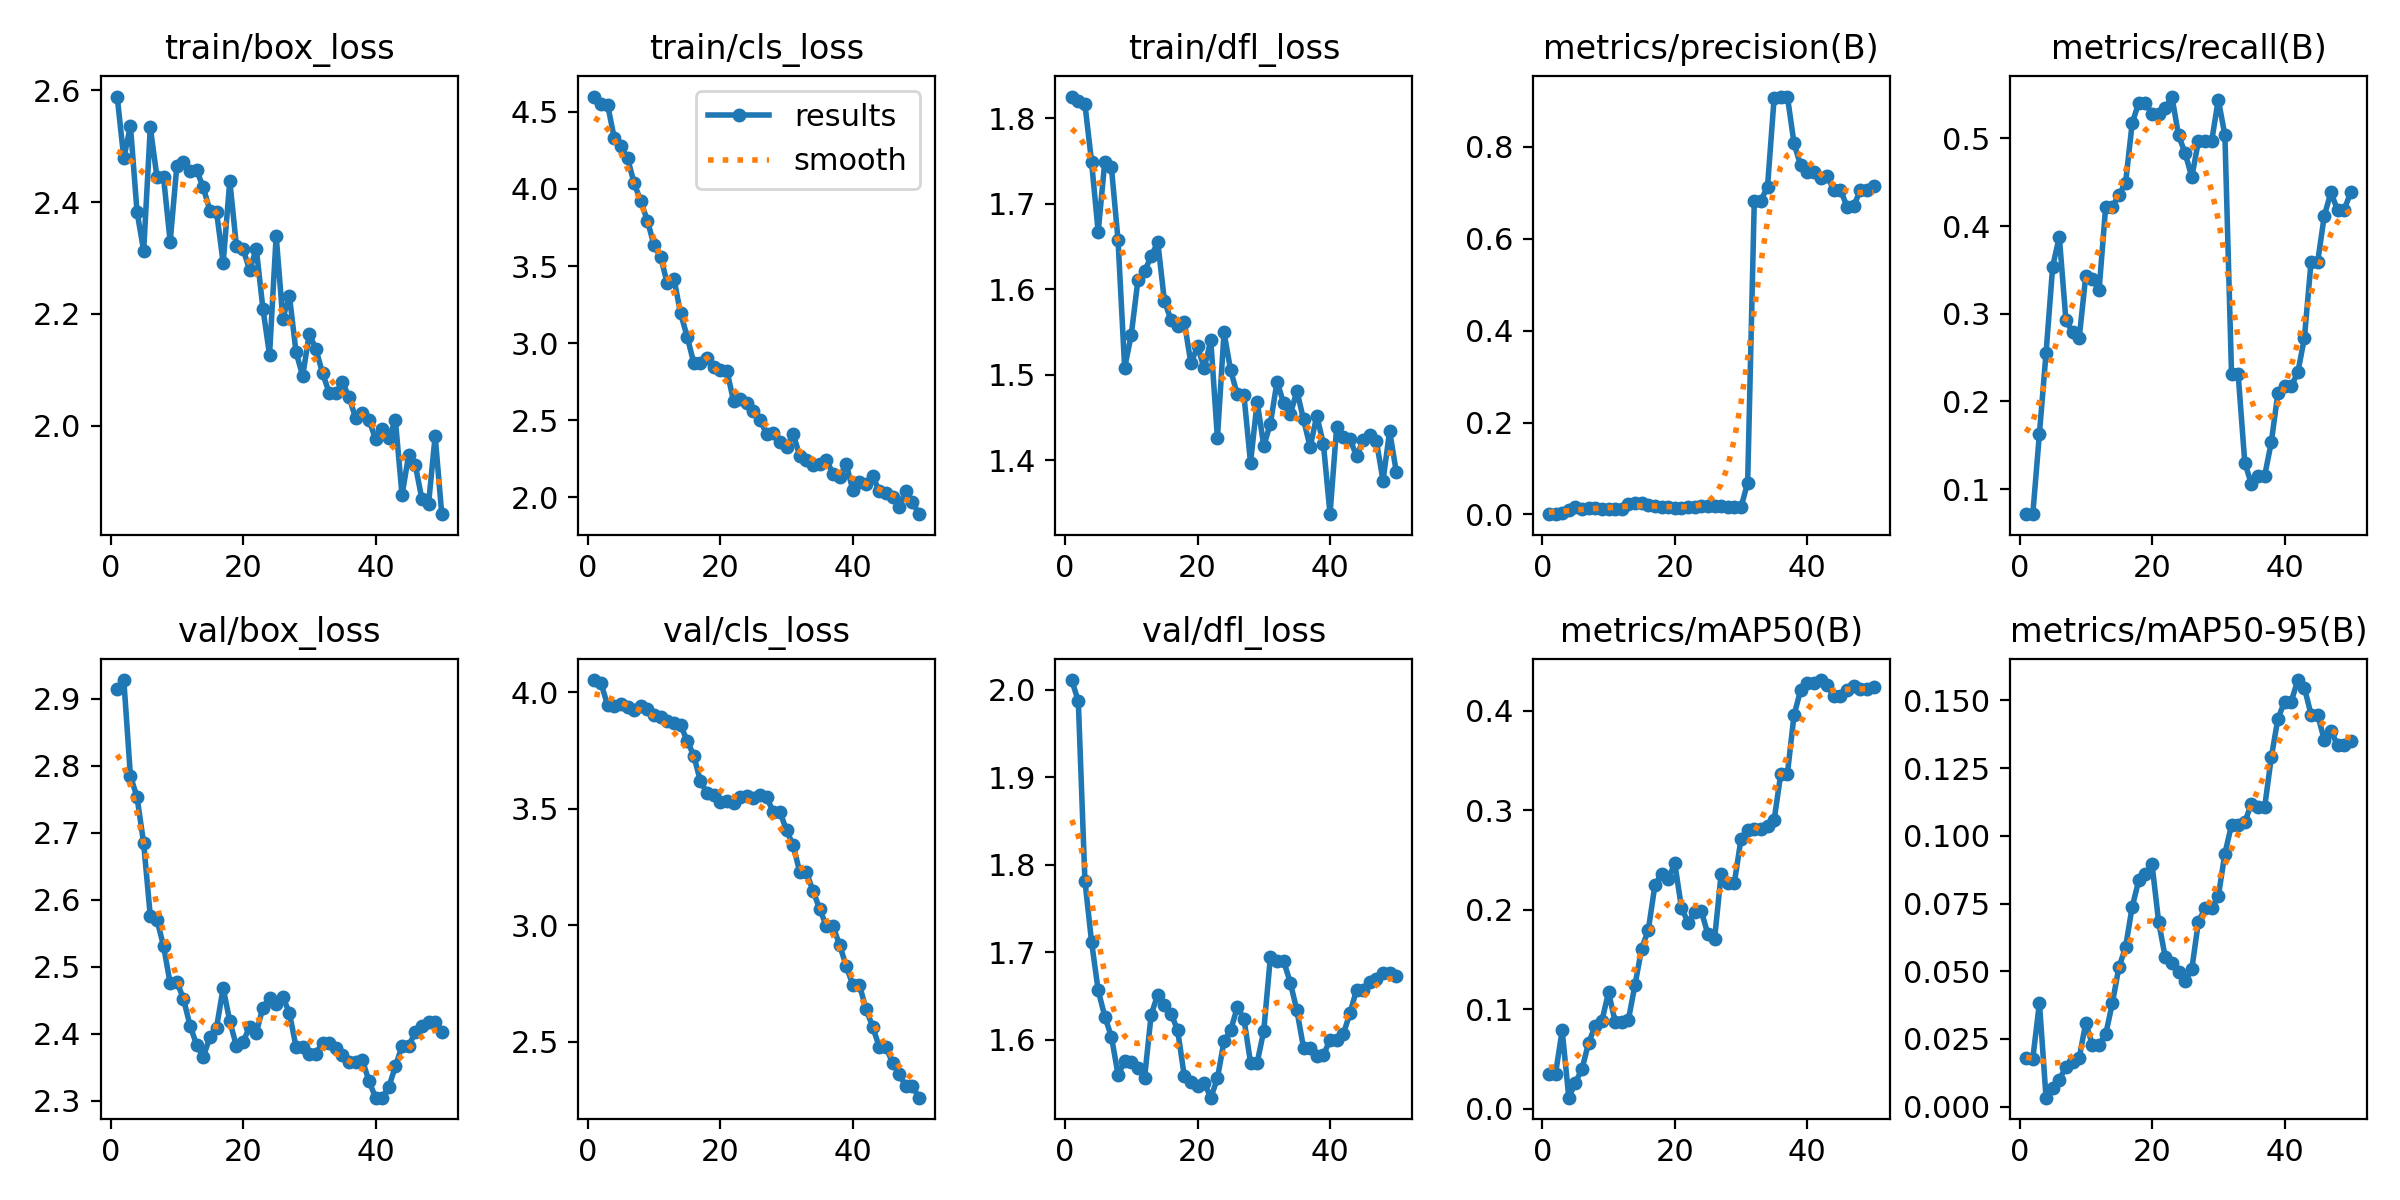

In [ ]:
Image("/content/runs/detect/train/results.png", width=600)

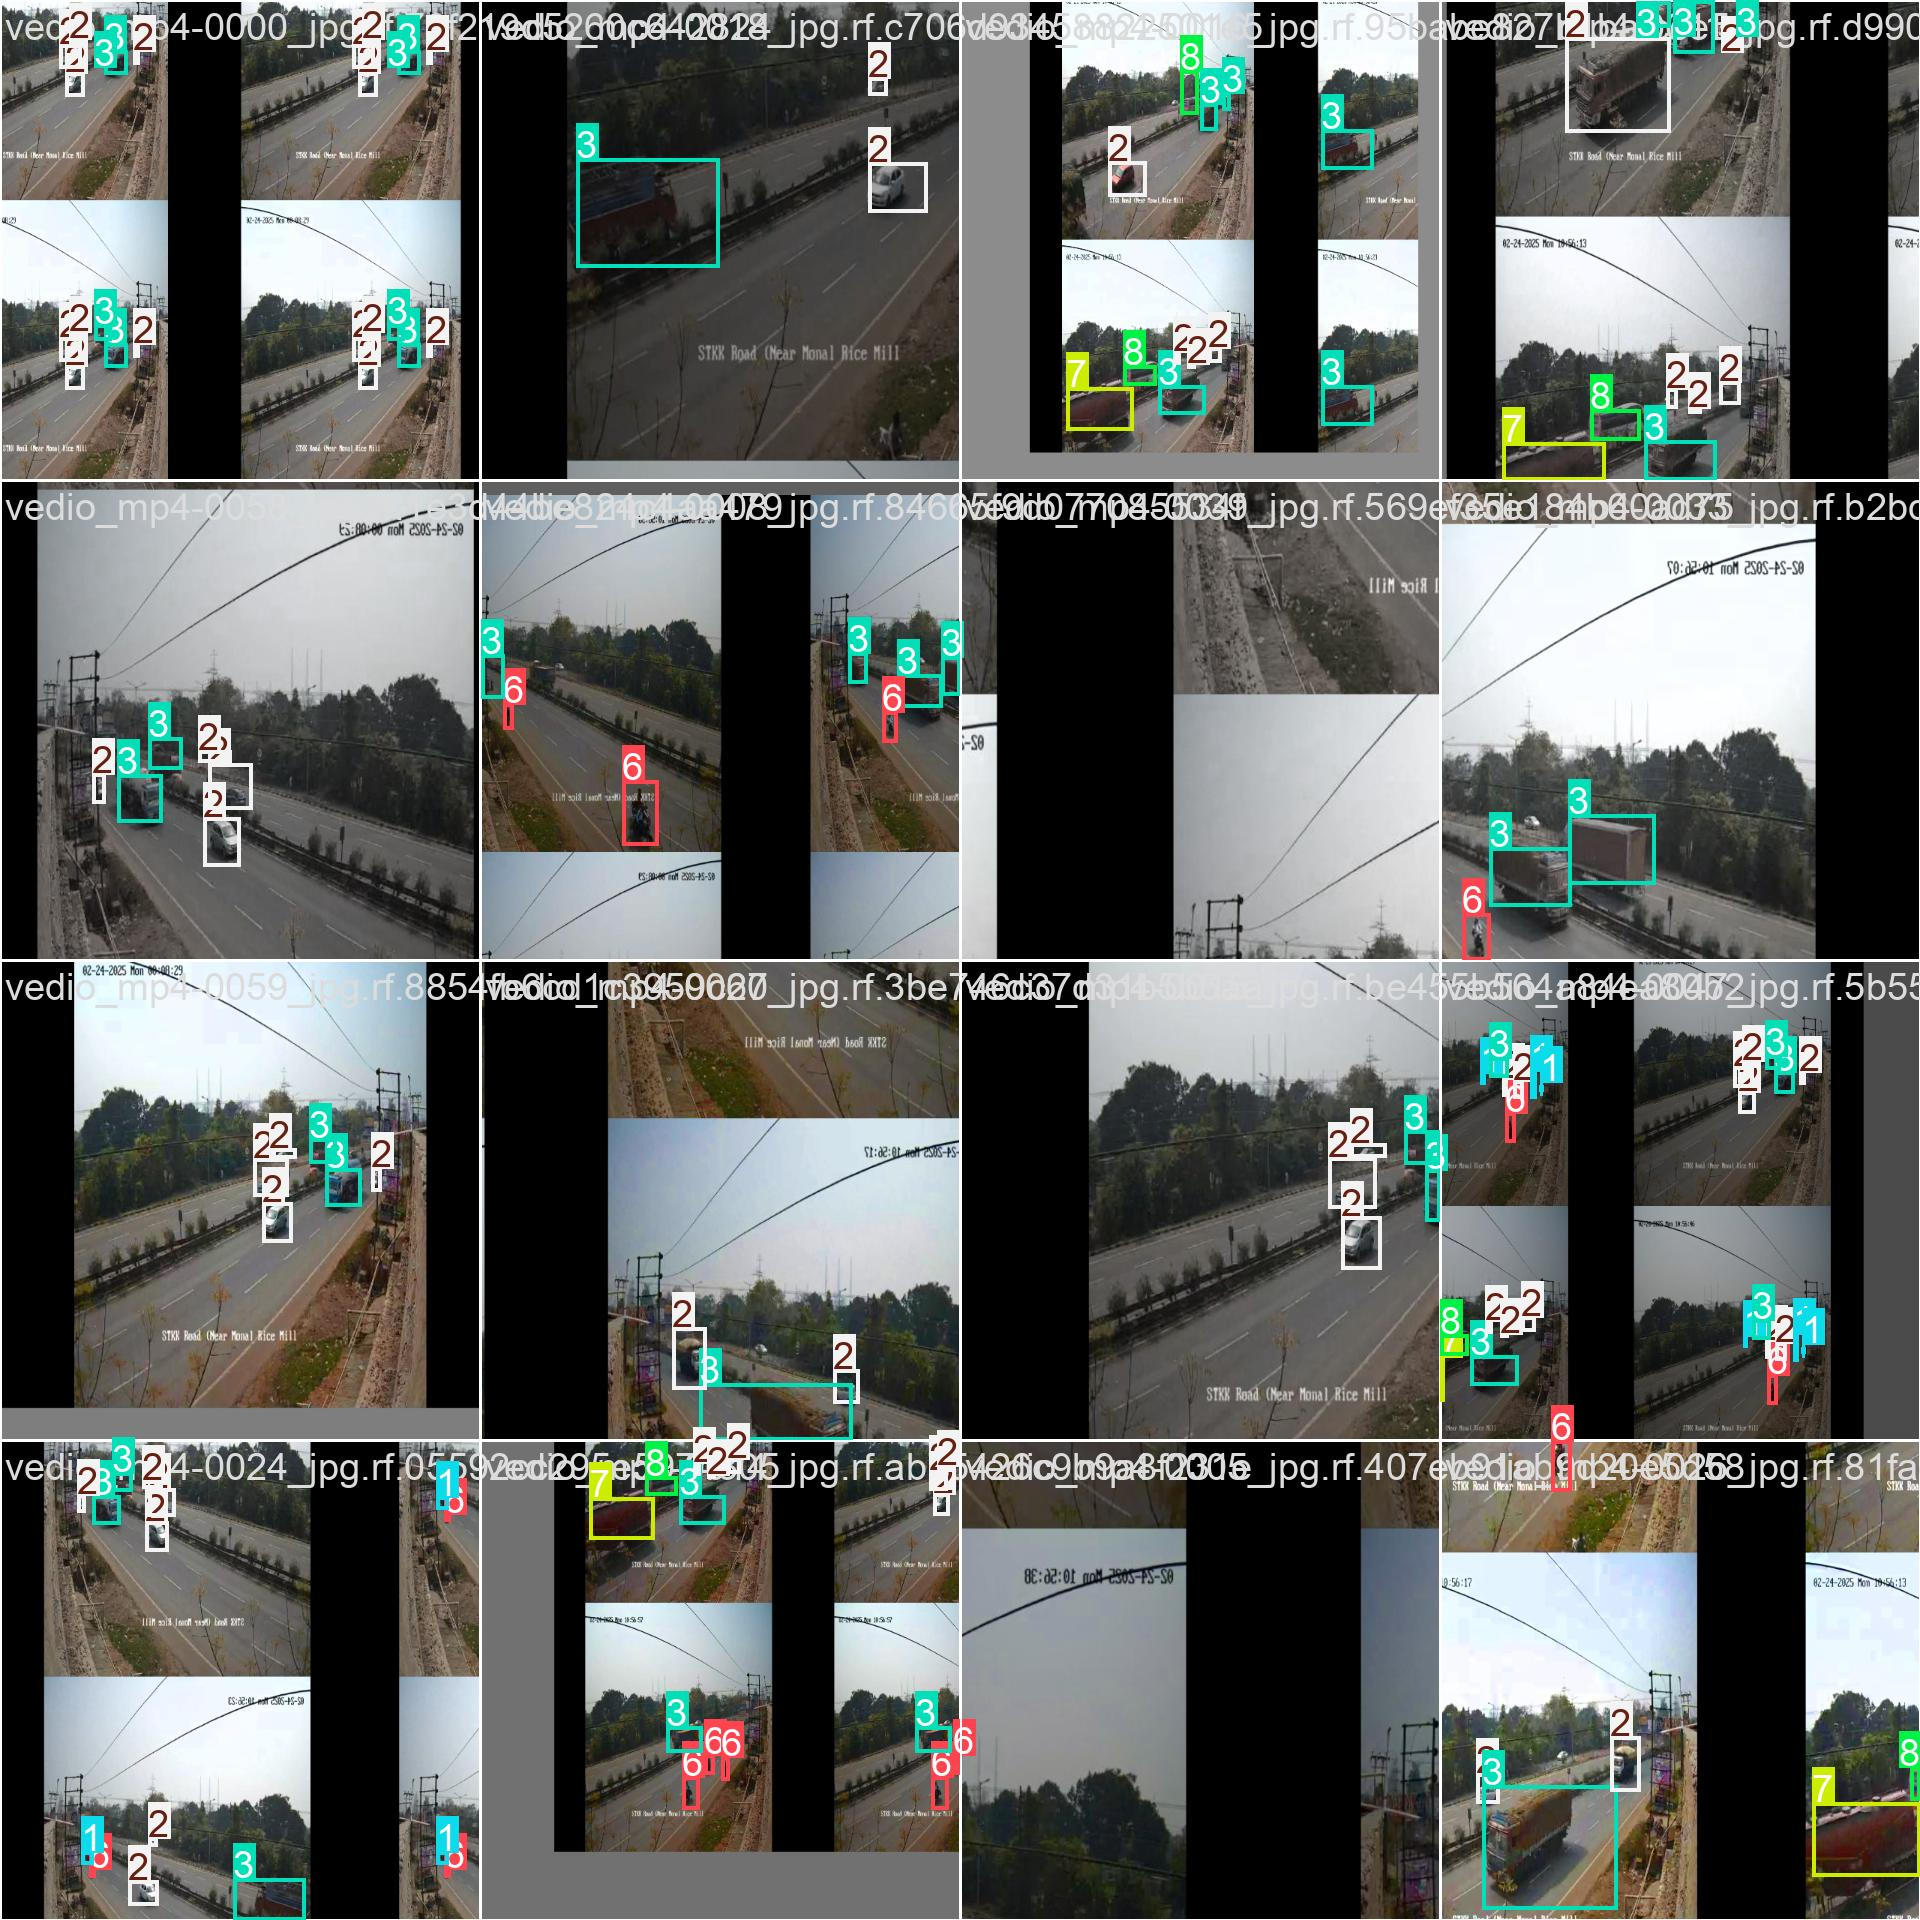

In [ ]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

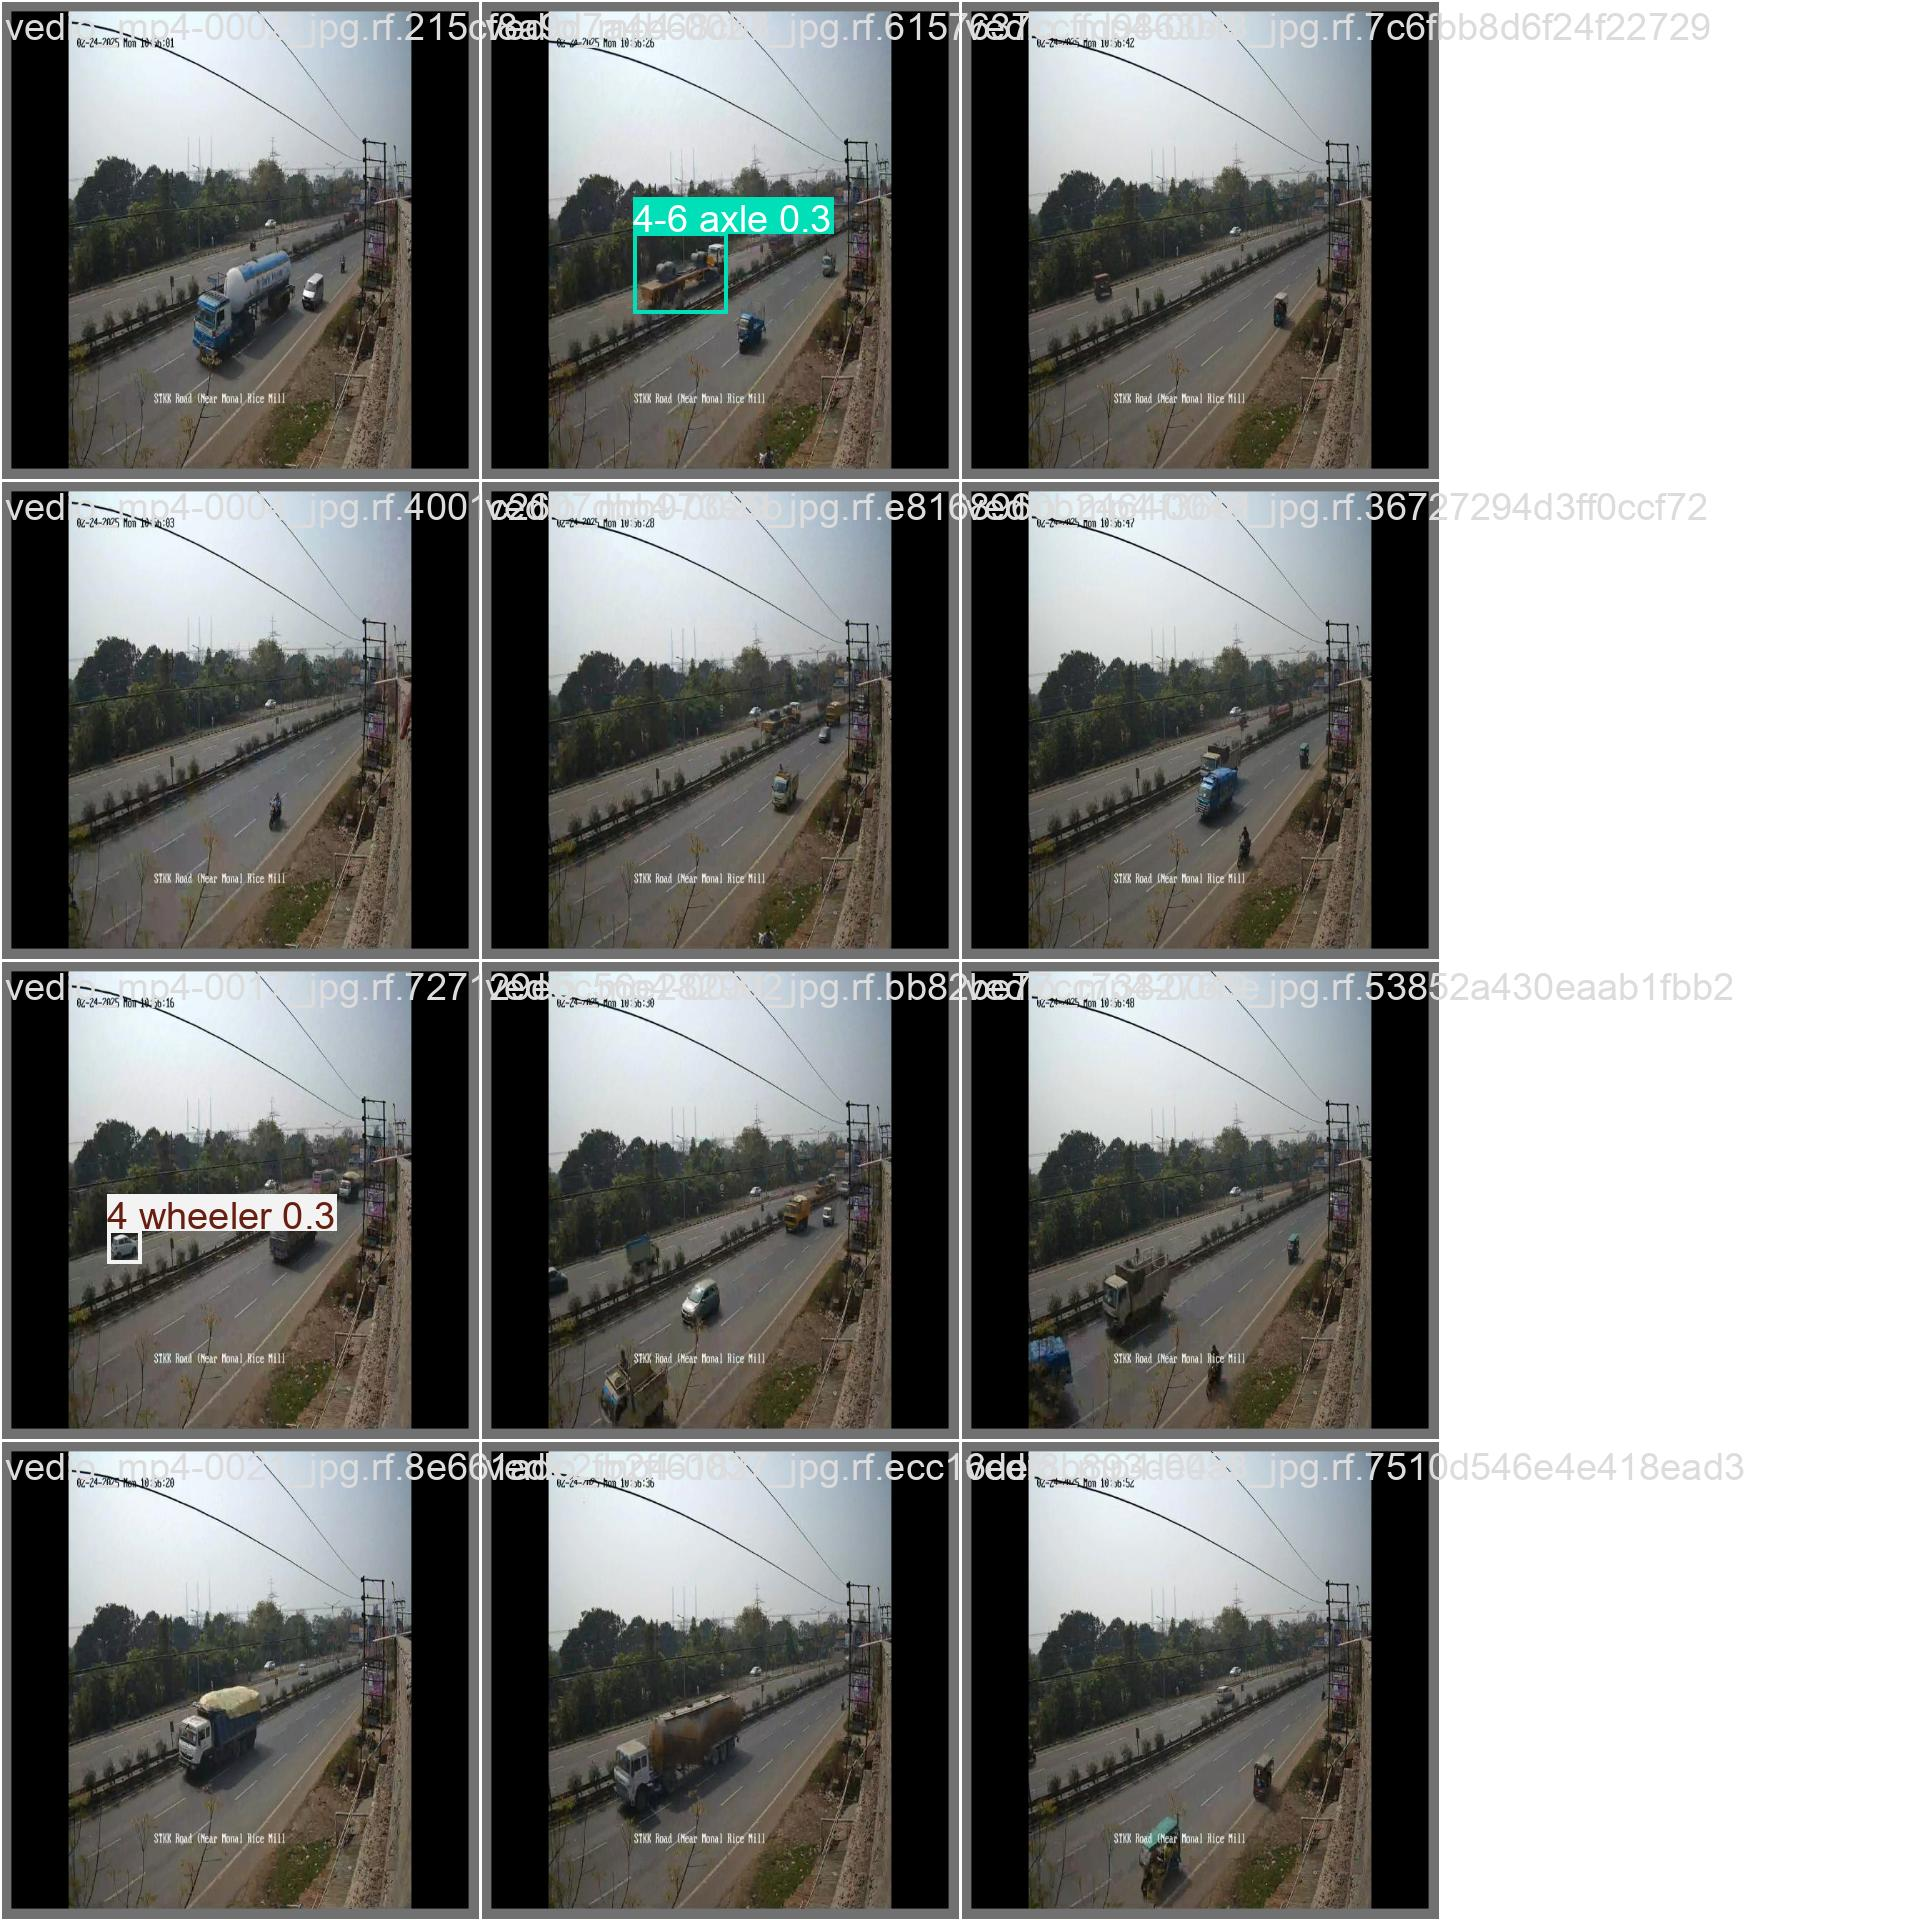

In [ ]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

In [ ]:
!ls /content/runs/detect/train/

args.yaml					    P_curve.png		train_batch121.jpg
confusion_matrix_normalized.png			    PR_curve.png	train_batch122.jpg
confusion_matrix.png				    R_curve.png		train_batch1.jpg
events.out.tfevents.1744174060.0ba317ea77b7.2300.0  results.csv		train_batch2.jpg
F1_curve.png					    results.png		val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	val_batch0_pred.jpg
labels.jpg					    train_batch120.jpg	weights


In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/My-First-Project-1/valid/labels.cache... 12 images, 0 backgrounds, 0 corrupt: 100% 12/12 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  2.43it/s]
                   all         12         46      0.732      0.233      0.431      0.157
       3 wheeler tempo          5          7      0.683      0.621      0.846      0.242
             4 wheeler         11         21      0.547      0.174      0.362      0.129
              4-6 axle          6          7      0.318      0.338      0.315     0.0985
                 Cycle          2          2          1          0          0          0
           Two wheeler          5          6      0.573        0.5      0.496     0.0805
      more than 6 axle          2          2   

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True


Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs

image 1/6 /content/My-First-Project-1/test/images/vedio_mp4-0010_jpg.rf.b11646b46d4ce9eb7686762e66abce6a.jpg: 640x640 2 4-6 axles, 11.8ms
image 2/6 /content/My-First-Project-1/test/images/vedio_mp4-0019_jpg.rf.63bc937fbe0b4129de016181f5fe30d3.jpg: 640x640 (no detections), 9.3ms
image 3/6 /content/My-First-Project-1/test/images/vedio_mp4-0023_jpg.rf.5d876e74e674af49ad83d35383595971.jpg: 640x640 (no detections), 8.3ms
image 4/6 /content/My-First-Project-1/test/images/vedio_mp4-0038_jpg.rf.0446f2697ade8b1884b1d4c7be31f7c7.jpg: 640x640 (no detections), 8.1ms
image 5/6 /content/My-First-Project-1/test/images/vedio_mp4-0040_jpg.rf.f1a78a1a64b692ee22ce8a1adeebead4.jpg: 640x640 (no detections), 8.1ms
image 6/6 /content/My-First-Project-1/test/images/vedio_mp4-0057_jpg.rf.9349e0376c482cc8994f52c2bbb0bef4.jpg: 640x640 (no detection

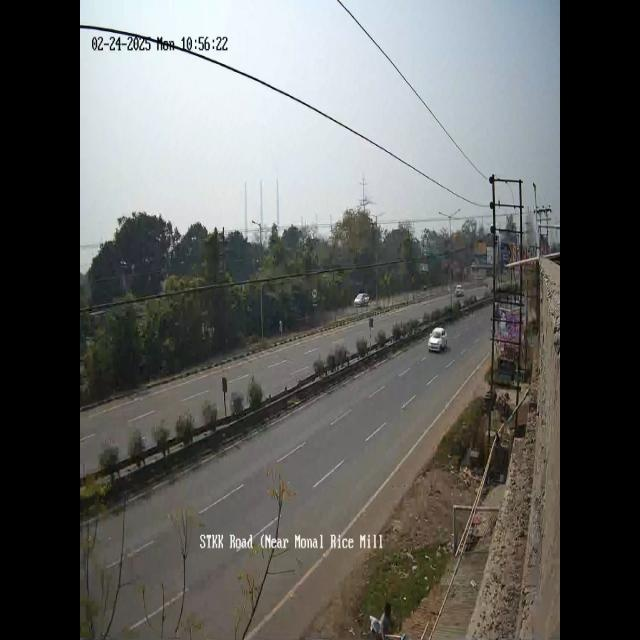

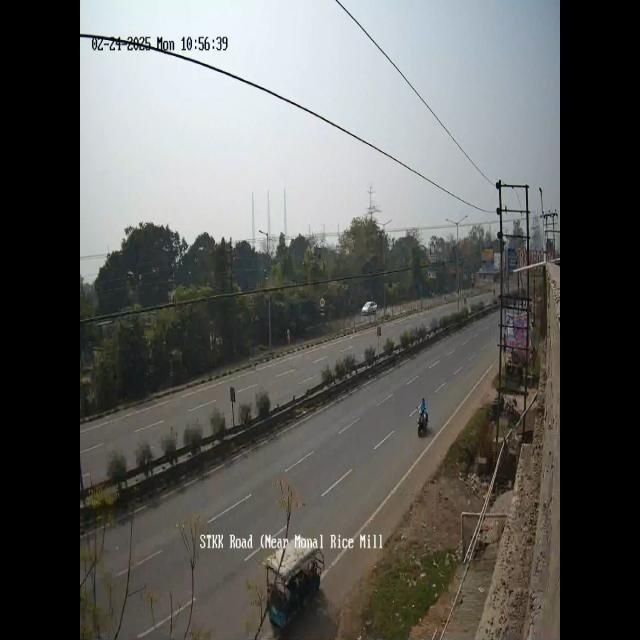

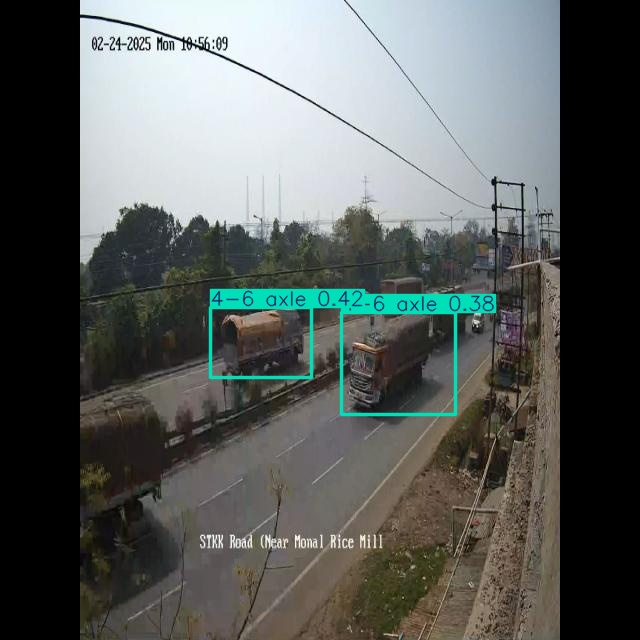

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
!gdown https://drive.google.com/file/d/1qkQTLWXDuMMjjTv-54lTNWW-lyDQmK7b/view?t=8

/usr/local/lib/python3.11/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1qkQTLWXDuMMjjTv-54lTNWW-lyDQmK7b
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1qkQTLWXDuMMjjTv-54lTNWW-lyDQmK7b/view?t=8
To: /content/view?t=8
8.92kB [00:00, 19.8MB/s]


In [ ]:
!ls /content

 My-First-Project-1   recent   runs  'view?t=8'   yolo11n.pt


In [ ]:
!ls /content

 My-First-Project-1   recent   runs   vedio.mp4  'view?t=8'   yolo11n.pt


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train4/weights/best.pt source=/content/video.mp4


Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 960, in entrypoint
    model = YOLO(model, task=task)
            ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/models/yolo/model.py", line 54, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 148, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 290, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py", line 1304, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
    

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/video.mp4


Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 989, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 550, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/predictor.py", line 236, in predict_cli
    for _ in gen:  # sourcery skip: remove-empty-nested-block, noqa
  File "/usr/local/lib/python3.11/dist-packages/to

In [ ]:
!ls /content/*.mp4

/content/vedio.mp4


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/*.mp4

Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/1802) /content/vedio.mp4: 384x640 (no detections), 52.9ms
video 1/1 (frame 2/1802) /content/vedio.mp4: 384x640 (no detections), 9.0ms
video 1/1 (frame 3/1802) /content/vedio.mp4: 384x640 (no detections), 11.6ms
video 1/1 (frame 4/1802) /content/vedio.mp4: 384x640 (no detections), 11.1ms
video 1/1 (frame 5/1802) /content/vedio.mp4: 384x640 1 4 wheeler, 9.3ms
video 1/1 (frame 6/1802) /content/vedio.mp4: 384x640 1 4 wheeler, 9.6ms
video 1/1 (frame 7/1802) /content/vedio.mp4: 384x640 (no detections), 9.7ms
video 1/1 (frame 8/1802) /content/vedio.mp4: 384x640 (no detections), 8.6ms
video 1/1 (frame 9/1802) /content/vedio.mp4: 384x640 (no detections), 10.9ms
video 1/1 (frame 10/1802) /content/vedio.mp4: 384x640 (no detections), 10.9ms
video 1/1 (frame 11/1802) /content/vedio.mp4: 384x640 (no detections), 8.9m

In [ ]:
!ls /content/runs/detect/predict/


vedio_mp4-0010_jpg.rf.b11646b46d4ce9eb7686762e66abce6a.jpg
vedio_mp4-0019_jpg.rf.63bc937fbe0b4129de016181f5fe30d3.jpg
vedio_mp4-0023_jpg.rf.5d876e74e674af49ad83d35383595971.jpg
vedio_mp4-0038_jpg.rf.0446f2697ade8b1884b1d4c7be31f7c7.jpg
vedio_mp4-0040_jpg.rf.f1a78a1a64b692ee22ce8a1adeebead4.jpg
vedio_mp4-0057_jpg.rf.9349e0376c482cc8994f52c2bbb0bef4.jpg


In [ ]:
!ls /content/runs/detect/predict2/vedio.avi

ls: cannot access '/content/runs/detect/predict2/vedio.avi': No such file or directory
